In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
import math
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
data = load_breast_cancer()
data.feature_names[0:30]


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [3]:
cancer = pd.DataFrame(data.data)
cancer.columns = data.feature_names
print(cancer.shape)
cancer.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer.loc[:,"target"] = data.target
print(cancer.shape)
cancer.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


まずはscikit-learnのAdaboostをやってみる

In [5]:
features = ["mean radius","mean texture"]
X = cancer.loc[:,features]
Y = cancer["target"]
print(X.shape)
print(Y.shape)

(569, 2)
(569,)


In [6]:
clf = AdaBoostClassifier()
clf.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [7]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1195951846, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=25847512, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1384384929, splitter='best'),
 DecisionTreeClassifier(class_weight=No

In [8]:
clf.classes_

array([0, 1])

In [9]:
clf.n_classes_

2

In [10]:
clf.estimator_weights_

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [11]:
clf.estimator_errors_

array([ 0.10896309,  0.22467506,  0.3471166 ,  0.38952872,  0.4087923 ,
        0.45724334,  0.43453705,  0.40737986,  0.42899796,  0.46265014,
        0.46254362,  0.43627798,  0.44889994,  0.47233126,  0.48575844,
        0.46248315,  0.47247677,  0.46179414,  0.45184032,  0.45408513,
        0.44580872,  0.47299806,  0.44362626,  0.48240828,  0.46353369,
        0.44032496,  0.47004666,  0.46563778,  0.46104599,  0.47615198,
        0.48470545,  0.46980369,  0.47421871,  0.47827401,  0.48209154,
        0.46490346,  0.46469307,  0.45623226,  0.45054223,  0.46997273,
        0.468814  ,  0.45390594,  0.46692962,  0.471828  ,  0.4764263 ,
        0.47169007,  0.46588666,  0.47640445,  0.49379394,  0.4925032 ])

In [12]:
clf.feature_importances_

array([ 0.54,  0.46])

In [13]:
clf.decision_function(X)

array([ -5.57702029e-01,  -8.26633923e-01,  -8.69871914e-01,
         3.83256919e-02,  -7.62346283e-01,   5.05628938e-02,
        -8.69871914e-01,   7.71980090e-03,   1.53625034e-02,
         8.68061628e-04,  -1.41363304e-01,  -8.25758778e-02,
        -8.85421349e-01,  -1.41363304e-01,  -7.82963391e-03,
        -1.77647782e-03,  -1.02783826e-03,  -1.25813869e-01,
        -8.78577998e-01,   1.15245431e-01,   5.82139850e-02,
         8.85762976e-01,  -1.82882384e-02,  -8.85421349e-01,
        -7.36000618e-02,  -7.12884131e-02,  -9.73392249e-03,
        -8.69871914e-01,  -1.26562508e-01,  -4.03346650e-02,
        -8.70620554e-01,   2.70191806e-02,  -1.63409730e-01,
        -8.70620554e-01,  -8.25758778e-02,  -8.23061460e-02,
        -9.73392249e-03,   6.73065787e-02,  -1.77647782e-03,
         7.71980090e-03,  -9.86283334e-04,  -8.61680084e-03,
        -8.85421349e-01,   7.71980090e-03,  -9.86283334e-04,
        -8.26633923e-01,   7.47863973e-01,   4.06584352e-02,
         1.58450810e-01,

In [14]:
clf.score(X,Y)

0.91388400702987693

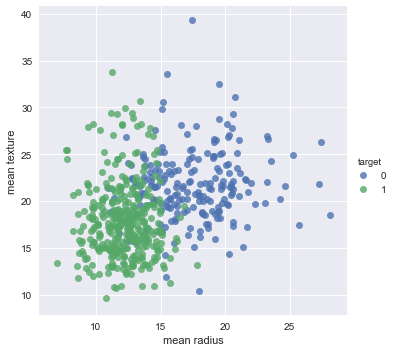

In [15]:
sns.lmplot("mean radius","mean texture",data=cancer,fit_reg=False,hue="target")


In [16]:
X.loc[:, features[0]].min()

6.9809999999999999

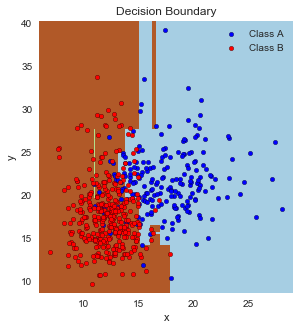

In [17]:

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X.loc[:, "mean radius"].min() - 1, X.loc[:,"mean radius" ].max() + 1
y_min, y_max = X.loc[:, "mean texture"].min() - 1, X.loc[:, "mean texture"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip([0,1], class_names, plot_colors):
    plt.scatter(X.loc[Y == i, "mean radius"], X.loc[Y == i, "mean texture"],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

まず教科書の例題を追っていく

In [86]:
#loggingしてみる
import logging

# create logger
logger = logging.getLogger('train_logger')
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

sample_logger = logging.getLogger("sample_logger")
sample_logger.setLevel(logging.INFO)
sample_logger.addHandler(ch)




In [87]:
class AdaBoost(object):
    """練習用AdaBoost"""
    #特徴量は2次元のみ
    ###基本関数h1~h8
    def __h1(self,x1,x2):
        if x1>-0.5:
            return(1)
        else:
            return(-1)
    
    def __h2(self,x1,x2):
        if x1>-0.5:
            return(-1)
        else:
            return(1)
        
    def __h3(self,x1,x2):
        if x1>0.5:
            return(1)
        else:
            return(-1)
    
    def __h4(self,x1,x2):
        if x1>0.5:
            return(-1)
        else:
            return(1)
        
    def __h5(self,x1,x2):
        if x2>-0.5:
            return(1)
        else:
            return(-1)
    
    def __h6(self,x1,x2):
        if x1>-0.5:
            return(-1)
        else:
            return(1)
        
    def __h7(self,x1,x2):
        if x2>0.5:
            return(1)
        else:
            return(-1)
    
    def __h8(self,x1,x2):
        if x2>0.5:
            return(-1)
        else:
            return(1)
###
    
    def __init__(self):
        
        self.eps_list =[] #誤差率　
        self.estimators_list =[]#選ばれた基本関数ht(x)
        self.estimators_list_name =[]
        self.estimators_weights = []#基本関数の重みalpha
        self.sample_dist =[]#サンプルの重み        
        self.result_list = []#正解なら1そうでないなら0の行列

        
        self.base_estimators = [self.__h1,self.__h2,self.__h3,self.__h4,self.__h5,self.__h6,self.__h7,self.__h8]
        
    
    
    def __train_estimator(self,X,y):
        
        logger.debug("y is :%s" %y)
        
        #最新のサンプル重みにおける最良の基本関数を選ぶ
        estimator_scores =[]
        for estimator in self.base_estimators:
            df = pd.DataFrame(X)
            func = lambda x:estimator(x[0],x[1])
            pred = X.apply(func,axis=1)
            
            logger.debug("training estimator"+str(estimator.__name__))
            logger.debug("its predict : %s"  %pred)
            
            result = (1+(pred * y))/2#予想とラベルを比べて正解なら1そうでないなら0の行列
            
            logger.debug("result: %s" %result)
            
            dist = self.sample_dist[-1]#最新のサンプル重み
            
            score = np.average(result, weights = dist)#サンプル重みで重み付け
            estimator_scores.append(score)
            
            logger.debug("score is"+str(score))
        
        estimator_index = np.argmax(np.array(estimator_scores))
        choosed_estimator = self.base_estimators[estimator_index] #一番スコアが良かった基本関数を選ぶ
        self.estimators_list.append(choosed_estimator) #選ばれた関数を記録しておく
        self.estimators_list_name.append(choosed_estimator.__name__)
        
        return choosed_estimator
    
    def __evaluate_error(self,X,y):
        #誤差の評価
        estimator = self.estimators_list[-1]
        df = pd.DataFrame(X)
        func = lambda x:estimator(x[0],x[1])
        pred = X.apply(func,axis=1)
            
        result = (1+(pred * y))/2#予想とラベルを比べて正解なら1そうでないなら0の行列
        dist = self. sample_dist[-1]#最新のサンプル重み
        score = np.average(result, weights = dist)#サンプル重みで重み付け
        error = 1 - score
        self.eps_list.append(error)
        
        return error
    
    def __update_sample_dist(self,X,y):
        #サンプル重みの更新
        
        dist = np.array(self.sample_dist[-1])
        df = pd.DataFrame(X) #1,2列目データ
        df.loc[:,"f"] = y #3列目f(x)
        
        func = lambda x:self.estimators_list[-1](x[0],x[1]) #4列目ht(x)
        df.loc[:,"h"] = df.apply(func,axis=1)
        fxh = df.loc[:,"f"].values * df.loc[:,"h"].values #各要素がf(x)*ht(x)の行列
        alpha = self.estimators_weights[-1]
        new_dist = dist * np.exp(-alpha*fxh)
        Z = new_dist.sum()
        new_dist_scaled = new_dist/Z #確率分布にするため正規化する
        
        sample_logger.debug("alpha: %s" %alpha)
        sample_logger.debug("new_dist: %s" %new_dist)
        sample_logger.debug("Z : %s" %Z)
        sample_logger.debug("new_dist_scaled: %s" %new_dist_scaled)
        
        self.sample_dist.append(new_dist_scaled)
        
        return new_dist_scaled
        
    
    def fit(self,X,y,init_dist,T):
        
        self.sample_dist.append(init_dist)
        
        for t in range(T):
            
            print("training... "+str(t)+"round")
            estimator = self.__train_estimator(X,y)
            
            eps = self.__evaluate_error(X,y)
            
            if eps < 0.5:
                estimator_weight = (1/2)*np.log(((1-eps)/eps))
                self.estimators_weights.append(estimator_weight)
                
                dist = self.__update_sample_dist(X,y)
                
                pred = self.predict(X)
                result = (1+(pred * y))/2
                self.result_list.append(result)
            
            else:
                break
                
                
    
    def __output(self,x):
        #ひとつのインスタンスに対して出力を出す．
        combine = []
        for estimator,estimator_weight in zip(self.estimators_list,self.estimators_weights):
            combine.append(estimator(x[0],x[1])*estimator_weight)
            
        return np.sign(sum(combine))
            
    def predict(self,X):
        df = pd.DataFrame(X)
        func = lambda x: self.__output(x)
        
        return df.apply(func,axis=1).values            
            
        
                
                
        
            
    
    

In [68]:
X = pd.DataFrame({0:[1,-1,0,0],1:[0,0,-1,1]})
X

,0,1
0,1,0
1,-1,0
2,0,-1
3,0,1


In [69]:
y=pd.Series([1,1,-1,-1])
y

0    1
1    1
2   -1
3   -1
dtype: int64

In [70]:
clf = AdaBoost()

In [71]:
print(clf.__doc__)

練習用AdaBoost


In [72]:
init_dist = np.empty(4)
init_dist.fill(1/4)
init_dist

array([ 0.25,  0.25,  0.25,  0.25])

In [73]:
clf.fit(X,y,init_dist,10)

training... 0round
training... 1round
training... 2round
training... 3round
training... 4round
training... 5round
training... 6round
training... 7round
training... 8round
training... 9round


In [74]:
clf.predict(data)

array([ 1.,  1., -1., -1.])

In [75]:
print(clf.eps_list)
print(clf.estimators_list_name)
print(clf.estimators_weights)
print(clf.sample_dist)
print(clf.result_list)

[0.25, 0.16666666666666663, 0.099999999999999978, 0.055555555555555469, 0.088235294117646967, 0.080645161290322398, 0.078947368421052433, 0.080952380952380887, 0.080310880829015385, 0.080281690140844963]
['__h2', '__h3', '__h5', '__h8', '__h2', '__h3', '__h5', '__h8', '__h2', '__h3']
[0.54930614433405489, 0.80471895621705036, 1.0986122886681098, 1.416606672028109, 1.1676874579085188, 1.2168066777002262, 1.2283678864106533, 1.2147384224243352, 1.2190652924951357, 1.2192629307209413]
[array([ 0.25,  0.25,  0.25,  0.25]), array([ 0.5       ,  0.16666667,  0.16666667,  0.16666667]), array([ 0.3,  0.5,  0.1,  0.1]), array([ 0.16666667,  0.27777778,  0.05555556,  0.5       ]), array([ 0.08823529,  0.14705882,  0.5       ,  0.26470588]), array([ 0.5       ,  0.08064516,  0.27419355,  0.14516129]), array([ 0.27192982,  0.5       ,  0.14912281,  0.07894737]), array([ 0.14761905,  0.27142857,  0.08095238,  0.5       ]), array([ 0.08031088,  0.14766839,  0.5       ,  0.27202073]), array([ 0.5    

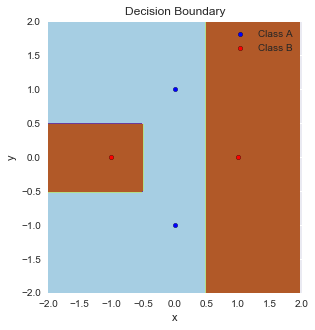

In [76]:

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))
# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X.loc[:, 0].min() - 1, X.loc[:,0].max() + 1
y_min, y_max = X.loc[:, 1].min() - 1, X.loc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip([-1,1], class_names, plot_colors):
    plt.scatter(X.loc[y == i, 0], X.loc[y == i, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

cancerでやってみる

In [91]:
features = ["mean radius","mean texture"]
X = cancer.loc[:,features]
Y = cancer["target"]
Y = Y.where(Y == 1,-1)
print(X.shape)
print(Y.shape)

(569, 2)
(569,)


In [92]:
clf = AdaBoost()
init_dist = np.empty(X.shape[0])
init_dist.fill(1/X.shape[0])
clf.fit(X,Y,init_dist,10)

training... 0round
training... 1round


In [97]:
clf.predict(X)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [98]:
print(clf.eps_list)
print(clf.estimators_list_name)
print(clf.estimators_weights)
print(clf.sample_dist)
print(clf.result_list)

[0.37258347978910367, 0.5]
['__h1', '__h1']
[0.26057475355381338]
[array([ 0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.00175747,
        0.00175747,  0.00175747,  0.00175747,  0.00175747,  0.0017574

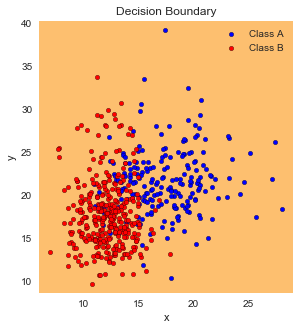

In [96]:

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))
# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X.loc[:, features[0]].min() - 1, X.loc[:,features[0]].max() + 1
y_min, y_max = X.loc[:, features[1]].min() - 1, X.loc[:, features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip([-1,1], class_names, plot_colors):
    plt.scatter(X.loc[Y == i, features[0]], X.loc[Y == i,features[1]],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

もちろんうまく行かない

to do:基本関数をかえる